In [1]:
!make -C .. station_measurements

make: Entering directory '/home/martibosch/data-science/invest-heat-islands'
make: Nothing to be done for 'station_measurements'.
make: Leaving directory '/home/martibosch/data-science/invest-heat-islands'


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
station_tair_filepath = '../data/interim/station-tair.csv'

In [4]:
station_tair_df = pd.read_csv(station_tair_filepath, index_col=0)

In [5]:
T_ref_ser = station_tair_df.min(axis=1)
T_max_ser = station_tair_df.max(axis=1)

In [6]:
def plot_date(ax, i, T_ref, T_max, UHI_max_kws, T_ref_kws, T_max_kws):
    ax.plot([i, i], [T_ref, T_max], **UHI_max_kws)
    ax.plot(i, T_ref, **T_ref_kws)
    ax.plot(i, T_max, **T_max_kws)
    return ax

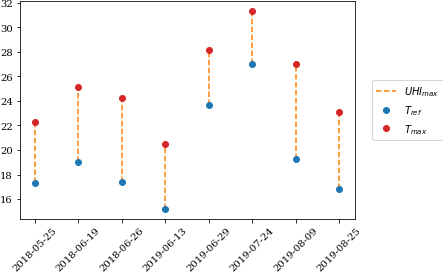

In [7]:
fig, ax = plt.subplots()

palette = sns.color_palette()
blue = palette[0]
orange = palette[1]
red = palette[3]

UHI_max_kws = dict(linestyle='--', color=orange, label='$UHI_{max}$')
T_ref_kws = dict(linestyle='None', marker='o', color=blue, label='$T_{ref}$')
T_max_kws = dict(linestyle='None', marker='o', color=red, label='$T_{max}$')

iterator = enumerate(zip(T_ref_ser, T_max_ser))

i, (T_ref, T_max) = next(iterator)
plot_date(ax, i, T_ref, T_max, UHI_max_kws, T_ref_kws, T_max_kws)

for kws in [UHI_max_kws, T_ref_kws, T_max_kws]:
    kws.pop('label')
for i, (T_ref, T_max) in iterator:
    plot_date(ax, i, T_ref, T_max, UHI_max_kws, T_ref_kws, T_max_kws)
ax.set_xticklabels([0] + station_tair_df.index.tolist(), rotation=45)
ax.legend(loc='center right', bbox_to_anchor=(1.28, .5))
fig.savefig('../reports/figures/t-ref-uhi-max.pdf')